# COVID-19 Inhibitors/Disruptors, BIDS
S. Ravichandran (ravichandrans@mail.nih.gov)

## Load the libraries

In [21]:
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import Image
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import rdDepictor
import pubchempy as pcp

#Needed to show molecules
from rdkit.Chem.Draw import IPythonConsole 

from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions 
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole

# Download this from http://pypi.python.org/pypi/futures
# for parallel jobs (especially for mordred large molecular dataset)
from concurrent import futures

### Let us display few of known COVID-19 inhibitors:

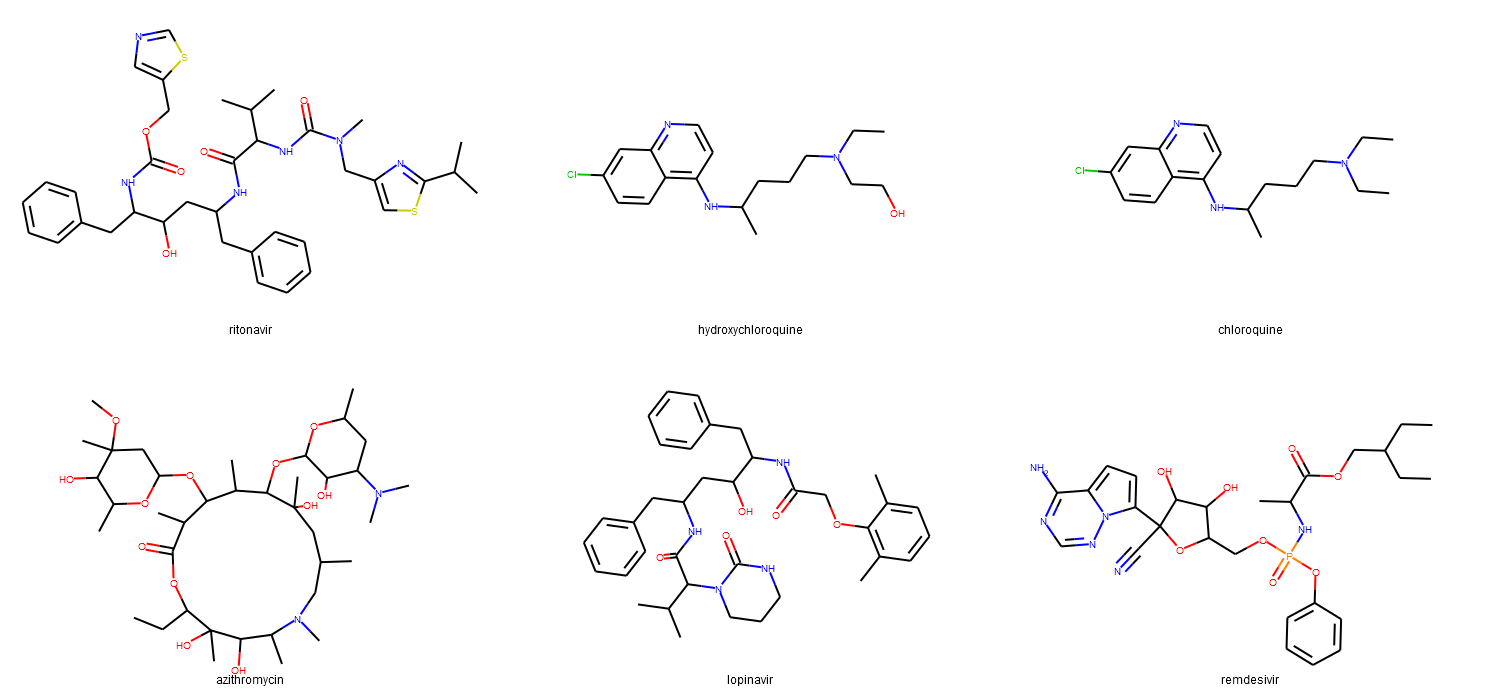

In [22]:
ritonavir = 'CC(C)C1=NC(=CS1)CN(C)C(=O)NC(C(C)C)C(=O)NC(CC2=CC=CC=C2)CC(C(CC3=CC=CC=C3)NC(=O)OCC4=CN=CS4)O'
hydroxychloroquine = 'CCN(CCCC(C)NC1=C2C=CC(=CC2=NC=C1)Cl)CCO'
chloroquine = 'CCN(CC)CCCC(C)NC1=C2C=CC(=CC2=NC=C1)Cl'
azithromycin = 'CCC1C(C(C(N(CC(CC(C(C(C(C(C(=O)O1)C)OC2CC(C(C(O2)C)O)(C)OC)C)OC3C(C(CC(O3)C)N(C)C)O)(C)O)C)C)C)O)(C)O'
lopinavir = 'CC1=C(C(=CC=C1)C)OCC(=O)NC(CC2=CC=CC=C2)C(CC(CC3=CC=CC=C3)NC(=O)C(C(C)C)N4CCCNC4=O)O'
remdesivir = 'CCC(CC)COC(=O)C(C)NP(=O)(OCC1C(C(C(O1)(C#N)C2=CC=C3N2N=CN=C3N)O)O)OC4=CC=CC=C4'

mols = [ ritonavir, hydroxychloroquine, chloroquine, azithromycin, lopinavir, remdesivir]
names = ['ritonavir', 'hydroxychloroquine', 'chloroquine', 'azithromycin', 'lopinavir', 'remdesivir']

mols = [Chem.MolFromSmiles(smi) for smi in mols]
for m in mols: tmp=AllChem.Compute2DCoords(m)

Draw.MolsToGridImage(mols, molsPerRow = 3, subImgSize=(500, 350), legends = names)

## Let us view the crystal structure of COVID-19 main protease in complex with carmofur

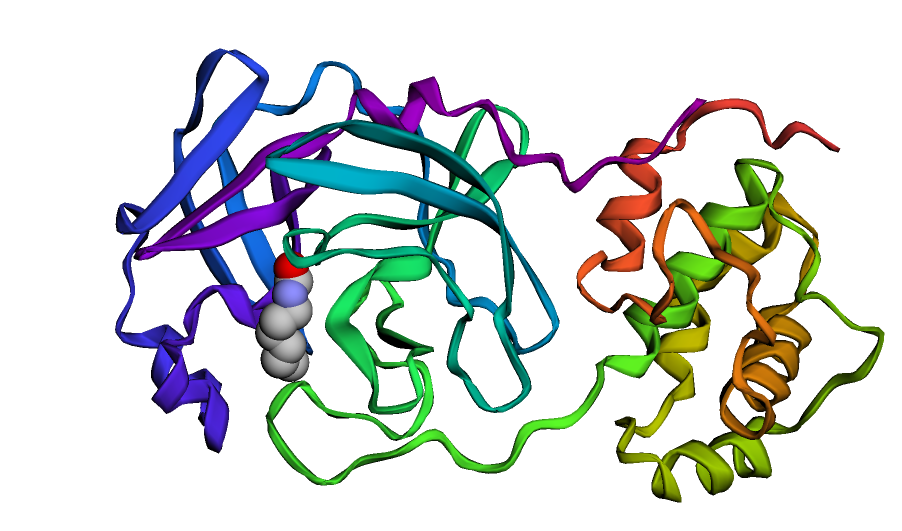

In [34]:
from IPython.core.display import Image
Image(filename='Img/7buy.PNG',width = 400, height = 400 )

You can regenerate the above figure using the following code. Note we are using py3Dmol library.

In [38]:
# http://3dmol.csb.pitt.edu/doc/tutorial-url.html
import py3Dmol
p = py3Dmol.view(query='mmtf:7buy')
p.setStyle({'cartoon': {'color':'spectrum'}})

view = py3Dmol.view(query='pdb:7buy')
chA = {'chain':'A'}
chB = {'resn':'JRY'}
view.setStyle(chA,{'cartoon': {'color':'spectrum'}})
# view.addSurface(py3Dmol.VDW,{'opacity':0.9,'color':'red'}, chB)
view.setStyle(chB,{'sphere':{}})
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## Homology model of M-Pro

Here is an image of the M-Pro homology model (created by I-TASSER).

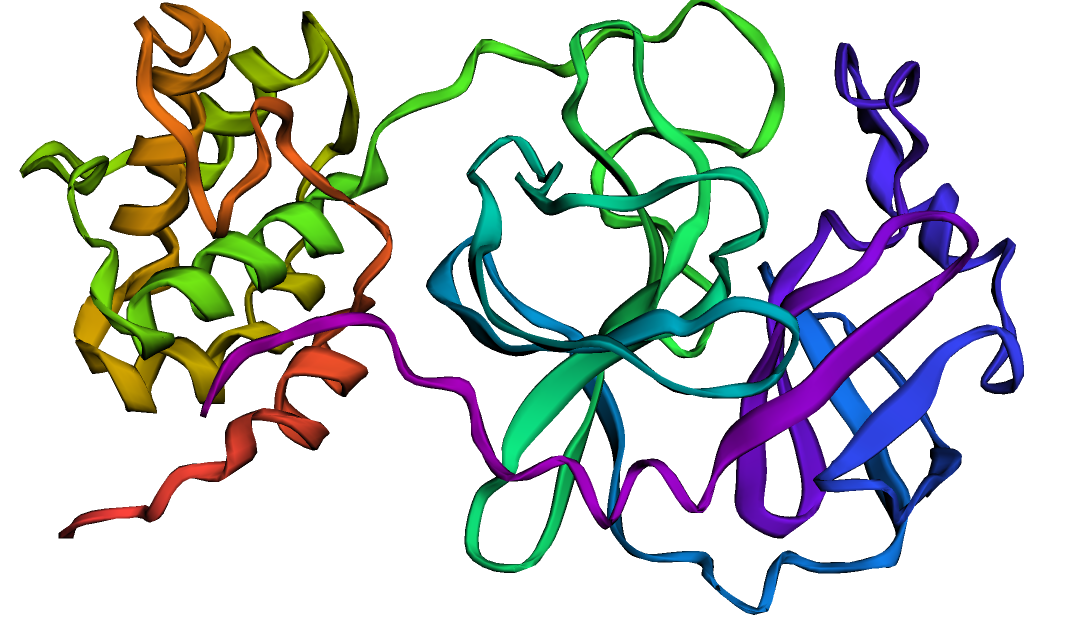

In [35]:
from IPython.core.display import Image
Image(filename='Img/QDH3415_5_IT_HM.PNG', width = 400, height = 400 )

You can regenerate the above figure using the following code. Note we are using py3Dmol library.

In [4]:
# http://3dmol.csb.pitt.edu/doc/tutorial-url.html
import py3Dmol
pdbdata=open('Data/QHD43415_5.pdb', 'r').read()
view=py3Dmol.view()
view.addModel(pdbdata,'pdb')
view.zoomTo()
view.setBackgroundColor('white')
view.setStyle({'cartoon': {'color':'spectrum'}})
# view.addSurface(py3Dmol.VDW,{'opacity':0.9,'color':'red'})
# view.addSurface(py3Dmol.SAS,{'opacity':1,'colorscheme':{'prop':'b','gradient':'rwb','min':-cut,'max':cut}})
view

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Please visit, https://zhanglab.ccmb.med.umich.edu/COVID-19/, to download all the COVID-19 protein homology models. 

## Let us read our custom compound library PubChem CIDs

The custom compond library is created by scanning the recent (since March 2020) COVID-19 publications (pre and published). Please note that a compound may occur multiple times in the library if it is identified in multiple studies. Some studies only report ZINC ids with no relevant PubChem IDs. We have left these compounds in a master file (`LiteratureSurveySmallMolecules-06052020.xlsx`). The `Moleculeslist.csv` is a copy of the master file without the compounds with only ZINC datatbase ids.

### PubChempy related comments 

* If PubChempy couldnt map a compound is PubChem, it will skip the rest of the compounds. 
* If by mistake you provide an SID instead of CID, then PubChempy sometimes will ignore the rest of the compound ids. 
For example, NNDNJ only has sid, 16423146 and no CID. 

In [25]:
from pubchempy import Compound, get_compounds

In [40]:
from itertools import islice 
cpds = pd.read_csv("MoleculesList.csv", encoding='iso-8859-1')
cid_list = cpds['PubChem'].to_list()
chunks = [cid_list[i:i+50] for i in range(0, len(cid_list), 50)]

## Convert the CIDs into SMILES string

In [41]:
pcp.get_substances([1, 2, 3, 4], as_dataframe=True)

cs = []
array_length = len(chunks)

for i in range(array_length):
    print('iteration: ',i)
    temp = pcp.get_compounds(chunks[i], 'cid')
    cs = cs + temp

iteration:  0
iteration:  1
iteration:  2
iteration:  3
iteration:  4


In [42]:
df4 = pcp.compounds_to_frame(cs, properties=['isomeric_smiles','xlogp', 'rotatable_bond_count'])
df4    

,isomeric_smiles,rotatable_bond_count,xlogp
cid,,,
3194,C1=CC=C(C=C1)N2C(=O)C3=CC=CC=C3[Se]2,1,NaN
3117,CCN(CC)C(=S)SSC(=S)N(CC)CC,7,3.9
11313622,C1=CC=C(C=C1)CN2C(=O)N(SC2=O)C3=CC=CC4=CC=CC=C43,3,4.3
2577,CCCCCCNC(=O)N1C=C(C(=O)NC1=O)F,5,2.6
479503,CC(=CC[C@H](C1=CC(=O)C2=C(C=CC(=C2C1=O)O)O)O)C,3,3.0
...,...,...,...
2577,CCCCCCNC(=O)N1C=C(C(=O)NC1=O)F,5,2.6
76310291,CC1=NC(=CS1)C2=CC=C(S2)[C@@H]3N(C4=C(C=C(C=C4)...,3,5.4
2719,CCN(CC)CCCC(C)NC1=C2C=CC(=CC2=NC=C1)Cl,8,4.6


## Display some of the molecules

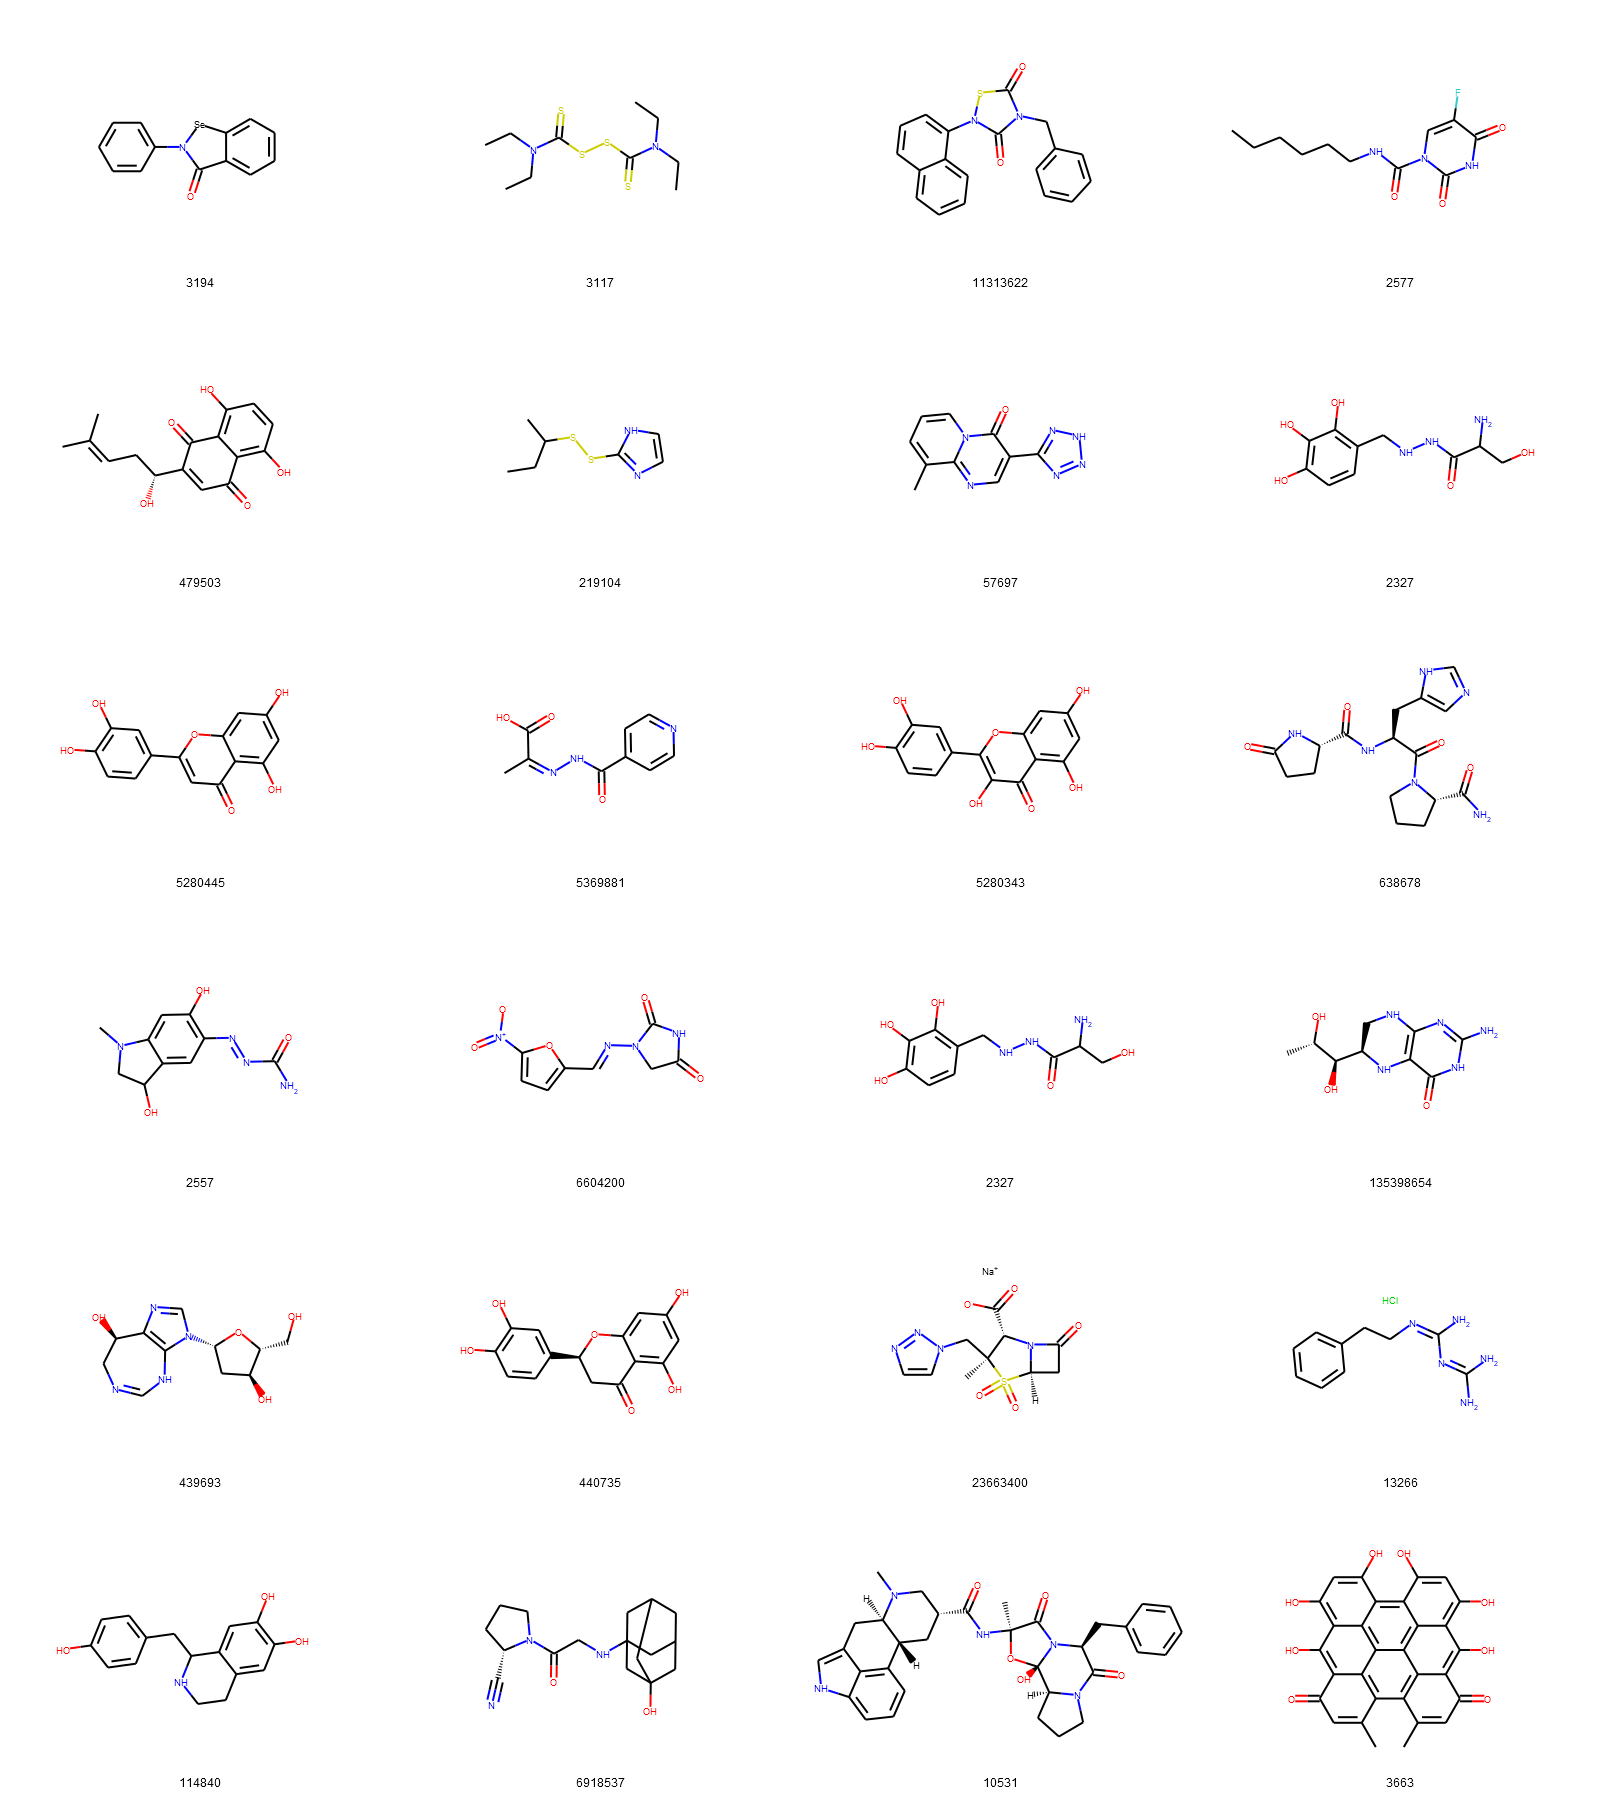

In [50]:
csm_list = df4.index.values.astype('str').tolist()

csm = [Chem.MolFromSmiles(x) for x in df4.isomeric_smiles.to_list()]

# show the molecules 
Draw.MolsToGridImage( csm[:24], molsPerRow = 4, subImgSize=(400, 300),legends = csm_list[:24])

## Pharmacophore visualization

Locating amide bonds in the molecule. 

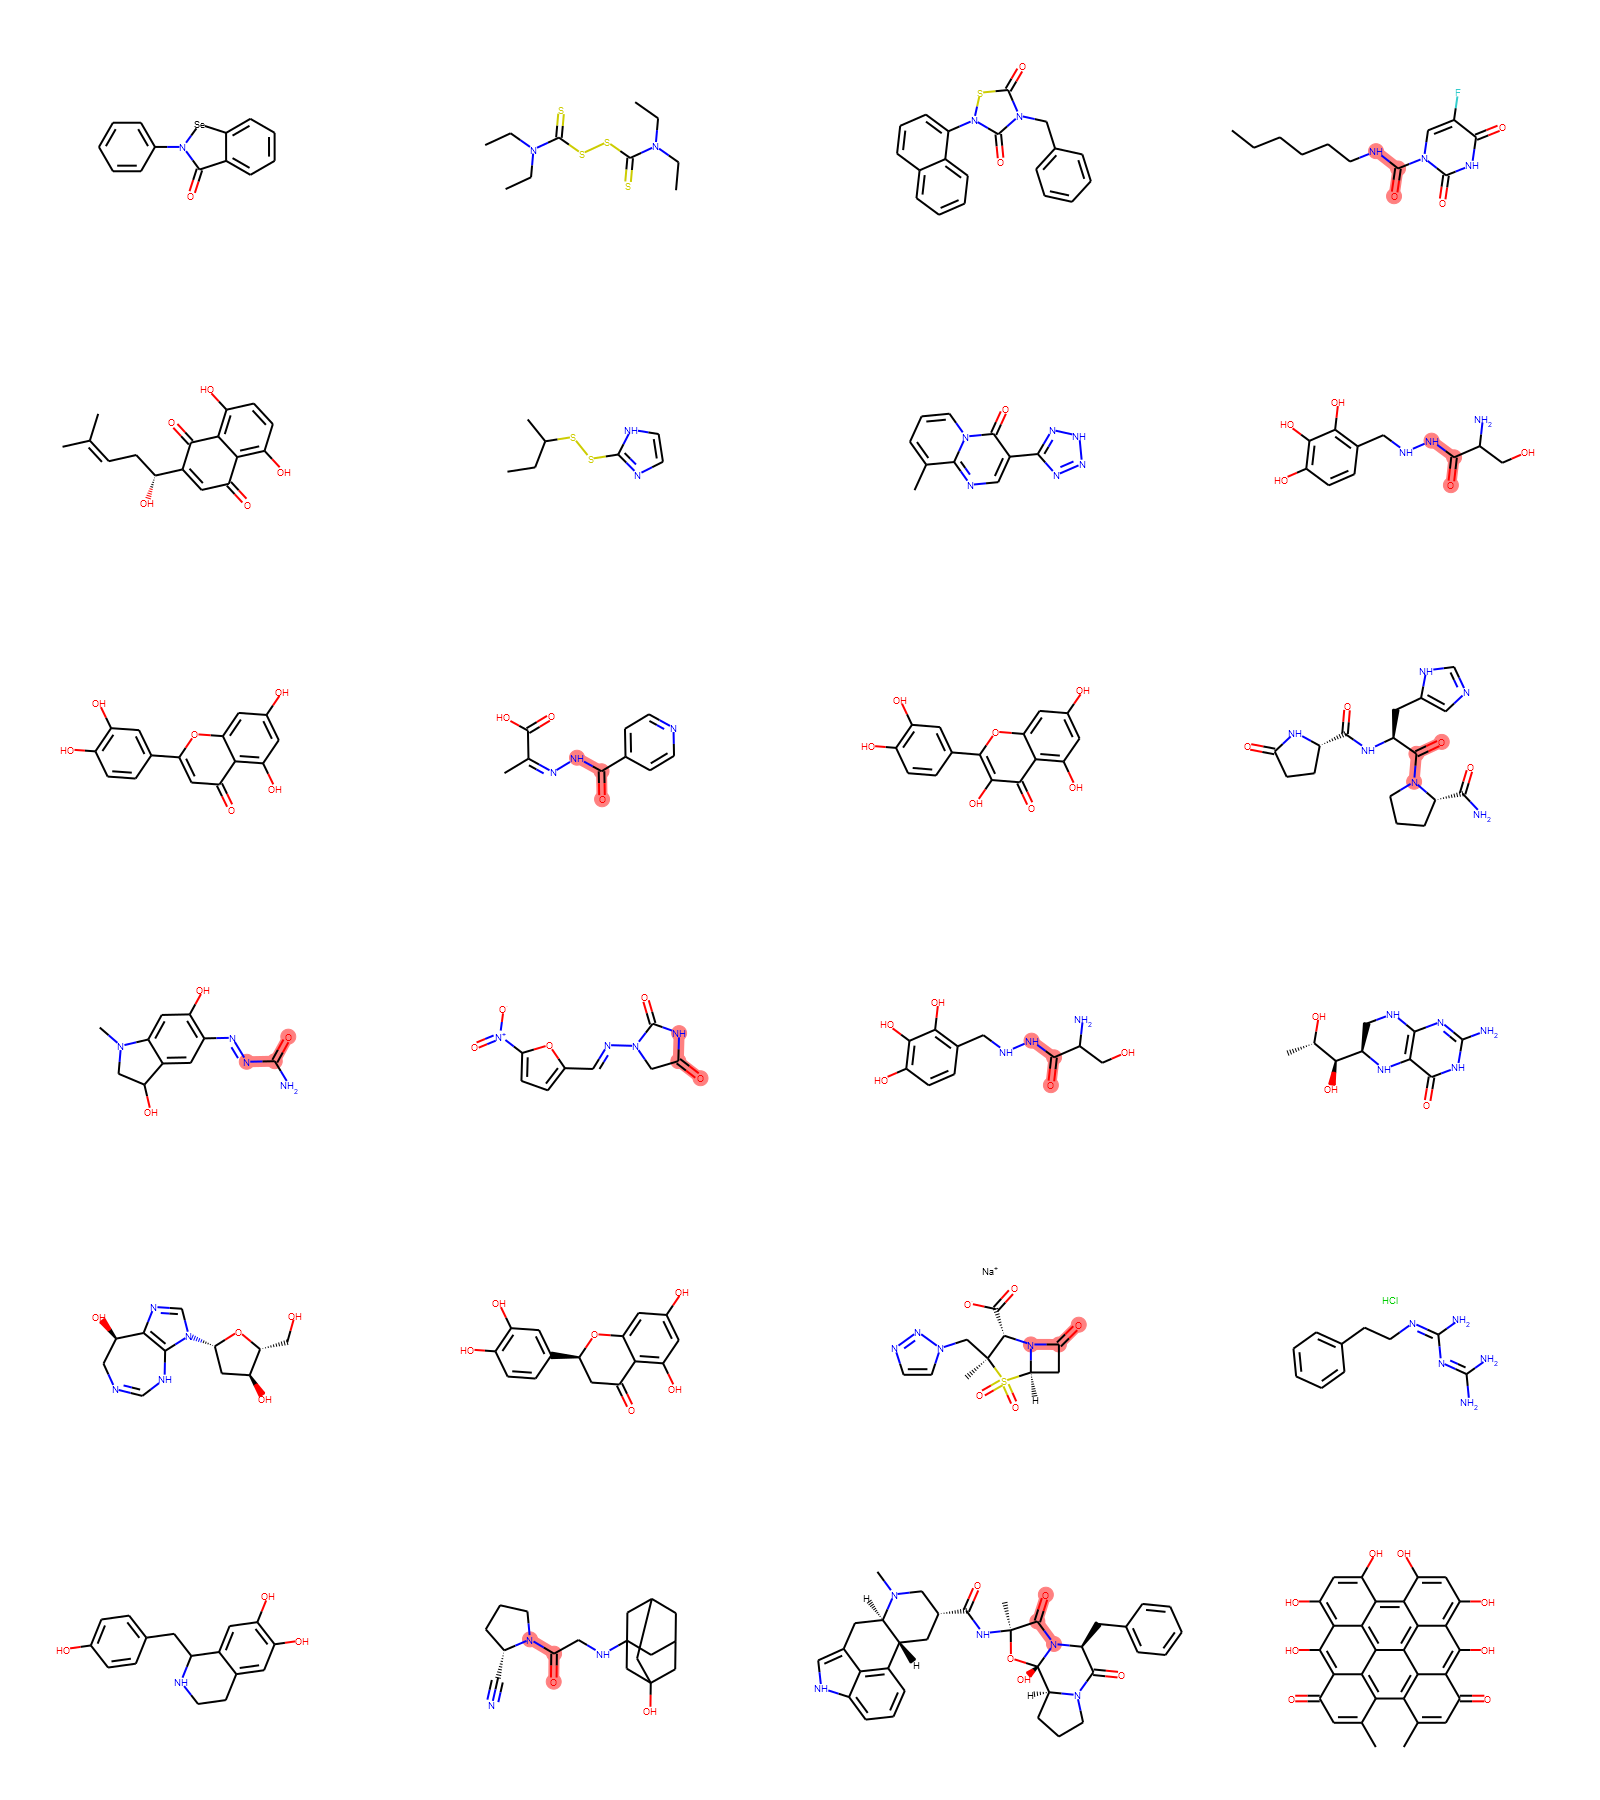

In [47]:
# highlightAtomLists is list of atom list that you want to highlight.

core = Chem.MolFromSmiles( 'C1=CC=CC2=C1C=CC=C2' ) 

#amide
core1 = Chem.MolFromSmiles( 'C(N[H])=O' ) 
Draw.MolsToGridImage( csm[:24], molsPerRow=4, subImgSize=(400, 300), highlightAtomLists=[mol.GetSubstructMatch(core1) for mol in csm[:24]] )

## Generating molecular properties

For this section, we will be using cdkit and Mordred (a molecular descriptor calculator) to generate molecular descriptors. Follow the links shown below for information on mordred calculator:

* https://jcheminf.biomedcentral.com/articles/10.1186/s13321-018-0258-y
* https://github.com/mordred-descriptor/mordred


Click here to see the complete list of mordred descriptors,
https://mordred-descriptor.github.io/documentation/master/descriptors.html

In [48]:
from rdkit import Chem
from mordred import Calculator, descriptors

# create descriptor calculator with all descriptors
calc = Calculator(descriptors, ignore_3D=True)

Here we are generating molecular descriptors for the first ten molecules. 

In [54]:
# as pandas
df = calc.pandas(csm[:10])

In [59]:
df.iloc[0:7,0:15]

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,VE2_A,VE3_A,VR1_A,VR2_A
0,12.675551,10.691629,0,0,21.747296,2.467683,4.743462,21.747296,1.359206,3.731392,3.575387,0.223462,1.744077,96.519637,6.032477
1,10.744501,11.044544,0,0,18.877841,2.210509,4.421017,18.877841,1.179865,3.607722,3.625913,0.226620,1.758110,66.462867,4.153929
2,19.068022,15.051707,0,0,32.397006,2.491733,4.903222,32.397006,1.349875,4.129666,4.203800,0.175158,2.311458,228.582191,9.524258
3,13.044161,11.533290,0,0,21.826167,2.359082,4.718164,21.826167,1.212565,3.764897,3.417424,0.189857,1.816674,407.029789,22.612766
4,16.038997,13.969917,0,0,25.921183,2.503405,5.006810,25.921183,1.234342,3.959040,3.838507,0.182786,2.087021,225.962164,10.760103
5,7.887564,7.802399,0,0,13.855917,2.187113,4.255178,13.855917,1.259629,3.281381,3.013289,0.273935,1.198342,46.673601,4.243055
6,13.451608,11.497362,2,0,22.492647,2.457867,4.902998,22.492647,1.323097,3.789440,3.797110,0.223359,1.864869,90.980960,5.351821


**Please inspect the descriptor table before you use them in other calculations. Especially when you are generating all the descriptors, some of the columns may contain NA or Nan etc.**

## Supporting pages:

* [RDKIT:](https://rdkit.org/docs/GettingStartedInPython.html)
* [RDKIT-Tutorials](https://github.com/rdkit/rdkit-tutorials/tree/master/notebooks)
* [RDKIT discussion board](https://sourceforge.net/p/rdkit/mailman/rdkit-discuss)
* [SMILES article](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3495655/)
* [SMILES Wikipedia link](https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system)